## Final Project Submission

Please fill out:
* Student name: Killion Mokaya
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Winnie Anyoso
* Blog post URL:

# Business Understanding

The selling price of a home is a critical factor in the real estate market, as it directly influences the financial outcome for both buyers and sellers. For homeowners, the selling price represents the return on their investment and can significantly impact their financial well-being. Potential buyers, on the other hand, rely on the selling price to make informed decisions about purchasing a property within their budget and assessing its value relative to similar properties in the market.

House price is influenced by a multitude of factors, which can be broadly categorized into three main categories: property-specific factors, market factors, and external factors. Property-specific factors encompass attributes such as location, size, condition, amenities, architectural style, and age of the property. Market factors include supply and demand dynamics, interest rates, mortgage availability, and prevailing economic conditions. External factors can range from neighborhood characteristics, such as school quality and crime rates, to broader influences like government policies, infrastructure development, and demographic trends.

Understanding the factors that influence the selling price of residential properties is of paramount importance to various stakeholders involved in the real estate industry. Real estate agents need this knowledge to provide accurate pricing recommendations and effective marketing strategies for their clients. Homeowners can benefit from understanding these factors to make informed decisions when pricing their properties. Investors and developers can leverage this knowledge to identify promising investment opportunities and maximize their returns. 

### Problem Statement
Real estate market is highly volatile, influenced by economic conditions, housing demand, and external factors. As such setting inappropriate prices and making uninformed decisions of when to sell a house can be counterproductive.  Research is essential to understand market trends and identify the best time to sell a home for maximizing its selling price. Analyzing property characteristics such as location, size, amenities, condition, and recent market trends through research aids in setting an appropriate selling price. By understanding how different home characteristics impact selling prices, the agency can help home owners mitigate the risk of setting inappropriate prices or making poor investment decisions.  

### Objectives
1. To understand factors that affect price of a house
2. To develop a model that can predict housing price based on various features. 
3. To make recommendations on how home owners can optimize selling price of a house 


## Importing Libraries

In [2]:

import pandas as pd
import numpy as np 
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format
import folium
from folium.plugins import MarkerCluster

## Data Understanding

#### Reading Data 

In [3]:
# Loads the data from three csv files
data=pd.read_csv('data/kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650    1.00        NaN  NONE  ...      7 Average       1180   
1      7242    2.00         NO  NONE  ...      7 Average       2170   
2     10000    1.00         NO  NONE  ...  6 Low Average        770   
3      5000    1.00         NO  NONE  ...      7 Average       1050   
4      8080    1.00         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0            0.0     1955          0.00    98178 47.51 -122.26           1340   
1          400.0     1951       1991.00    98125 47.72 -122.32           1690   
2            0.0     1933           NaN    98028 47.74 -122.23           2720   
3          910.0     1965          0.00    98136 47.52 -122.39           1360   
4            0.0     1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
# Understading data columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- The dataset has 21 columns with 21597 rows. 

- There are 6  and 15 categorical and numerical variables respectively


### Summary statistics
#### The summary statistics are  only computed for relevant columns. As such non-numerical variables are excluded. Also, id, date, `yr_built` `yr_renovated`, `zipcode`, `lat`  and  `long`  are excluded as  their summaries do not add value 

In [5]:
### Summary statistics 
columns_to_exclude = ['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
data_for_summary = data.drop(columns=columns_to_exclude)
data_for_summary.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count   21597.00  21597.00   21597.00     21597.00   21597.00 21597.00   
mean   540296.57      3.37       2.12      2080.32   15099.41     1.49   
std    367368.14      0.93       0.77       918.11   41412.64     0.54   
min     78000.00      1.00       0.50       370.00     520.00     1.00   
25%    322000.00      3.00       1.75      1430.00    5040.00     1.00   
50%    450000.00      3.00       2.25      1910.00    7618.00     1.50   
75%    645000.00      4.00       2.50      2550.00   10685.00     2.00   
max   7700000.00     33.00       8.00     13540.00 1651359.00     3.50   

       sqft_above  sqft_living15  sqft_lot15  
count    21597.00       21597.00    21597.00  
mean      1788.60        1986.62    12758.28  
std        827.76         685.23    27274.44  
min        370.00         399.00      651.00  
25%       1190.00        1490.00     5100.00  
50%       1560.00        1840.00     7620.00  
75%       2210.00        2360.00    10083.00  
max       9410.00        6210.00   871200.00

##### The King County House Sales dataset is an ideal resource for building a predictive model that a real estate agency can utilize to advise clients on selling their properties. The dataset's historical nature enables the model to identify past trends and patterns, aiding in accurate predictions of future house prices. With relevant attributes such as price, date, size, grade and condition, the model can assess how these factors influence property value. The dataset's comprehensive information and property details, allows the model to consider multiple factors and provide tailored recommendations. By leveraging these dataset qualities, the agency can offer clients informed advice for selling their houses.

###  Data Cleaning

#### This section entails checking  for data consisteny, data cleaning among others 

In [6]:
# Checking for missing values 
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

*  `waterfront`, `view` and `yr_renovated` have missing values 

#### Dealing with missing values

#### The decision criteria is to check percentage of missing values. If less than 30% are missing, the column is kept while the missing values are dropped. 

In [7]:
# Specify the columns with missing valueslabel
columns_with_missing_values = ['waterfront', 'view', 'yr_renovated']

# Calculate the number and percentage of missing values for each column
missing_values_table = pd.DataFrame([
    {
        'Column': column,
        'Missing Count': data[column].isnull().sum(),
        'Missing Percentage': (data[column].isnull().sum() / len(data[column])) * 100
    }
    for column in columns_with_missing_values
])

# Display the missing values table
print(missing_values_table)

         Column  Missing Count  Missing Percentage
0    waterfront           2376               11.00
1          view             63                0.29
2  yr_renovated           3842               17.79


In [8]:
# Dropping missing values
data.dropna(inplace=True)

#### Duplicates 

In [9]:
# Checking for duplicates
duplicate_rows = data[data.duplicated()]
# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


* The data does not have duplicates

##### Checking id duplicates 

##### id is the unique identifier hence was checked to determine duplicates of houses. 

In [10]:
# Checking if there are id duplicates
id_duplicates = data[data.duplicated(subset=['id'], keep=False)]
id_duplicates

id        date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535   7/25/2014  430000.00         3       1.50         1580   
94     6021501535  12/23/2014  700000.00         3       1.50         1580   
313    4139480200   6/18/2014 1380000.00         4       3.25         4290   
314    4139480200   12/9/2014 1400000.00         4       3.25         4290   
717    8820903380   7/28/2014  452000.00         6       2.25         2660   
...           ...         ...        ...       ...        ...          ...   
20038  8648900110   8/26/2014  555000.00         3       2.50         1940   
20164  7853400250    6/4/2014  610000.00         4       3.50         2910   
20165  7853400250   2/19/2015  645000.00         4       3.50         2910   
20763  6300000226   6/26/2014  240000.00         4       1.00         1200   
20764  6300000226    5/4/2015  380000.00         4       1.00         1200   

       sqft_lot  floors waterfront  view  ...         grade sqft_above  \
93         5000    1.00         NO  NONE  ...        8 Good       1290   
94         5000    1.00         NO  NONE  ...        8 Good       1290   
313       12103    1.00         NO  GOOD  ...  11 Excellent       2690   
314       12103    1.00         NO  GOOD  ...  11 Excellent       2690   
717       13579    2.00         NO  NONE  ...     7 Average       2660   
...         ...     ...        ...   ...  ...           ...        ...   
20038      3211    2.00         NO  NONE  ...        8 Good       1940   
20164      5260    2.00         NO  NONE  ...      9 Better       2910   
20165      5260    2.00         NO  NONE  ...      9 Better       2910   
20763      2171    1.50         NO  NONE  ...     7 Average       1200   
20764      2171    1.50         NO  NONE  ...     7 Average       1200   

       sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
93             290.0     1939          0.00    98117 47.69 -122.39   
94             290.0     1939          0.00    98117 47.69 -122.39   
313           1600.0     1997          0.00    98006 47.55 -122.10   
314           1600.0     1997          0.00    98006 47.55 -122.10   
717              0.0     1937       1990.00    98125 47.71 -122.29   
...              ...      ...           ...      ...   ...     ...   
20038            0.0     2009          0.00    98027 47.56 -122.09   
20164            0.0     2012          0.00    98065 47.52 -121.88   
20165            0.0     2012          0.00    98065 47.52 -121.88   
20763            0.0     1933          0.00    98133 47.71 -122.34   
20764            0.0     1933          0.00    98133 47.71 -122.34   

       sqft_living15  sqft_lot15  
93              1570        4500  
94              1570        4500  
313             3860       11244  
314             3860       11244  
717             1120        8242  
...              ...         ...  
20038           1880        3078  
20164           2910        5260  
20165           2910        5260  
20763           1130        1598  
20764           1130        1598  

[172 rows x 21 columns]

*  There were 171 houses with duplicates. Further scrutiny shows that they  have different prices and dates sold. This shows that they are not duplicates but houses with same id sold more than once.

#### Outliers
##### Outliers were checked only for numerical discrete and continuous variables.  Categorical variables do not have numerical order hence cannot be checked for outliers. ALso `yr_built` `yr_renovated`,  `zipcode`, `lat`  and  `long`  were exlcuded given it makes sense to check for incosistencies than outliers

In [11]:
# columns to check for outliers
columns_to_check = ['price', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
def check_outliers(data, columns):
    # Iterate over the specified columns
    for column in columns:
        # Calculate quartiles and interquartile range
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1

        # Outlier thresholds
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr

        # Find outliers
        outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]

        # Print the count of outliers
        print(column)
        print("Number of outliers:", len(outliers))
        print()

# Call the function to check outliers and print the results
check_outliers(data, columns_to_check)

price
Number of outliers: 831

sqft_lot
Number of outliers: 1796

sqft_above
Number of outliers: 438

sqft_living15
Number of outliers: 371

sqft_lot15
Number of outliers: 1627



* The above findings show variables have outliers. Research on house properties shows  the outliers are property features. The outliers are kept as they are actual events which are informative in  predicting house prices. 

##### Data Consistency

In [12]:
# Function to check data consistency and detect placeholders
for column in data.columns:
    unique_values = data[column].unique()
    placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    unique_value_counts = data[column].value_counts()    
    print(f"Column: '{column}'")
    print(f"Unique value counts:")
    print(unique_value_counts)
    print()
    print(f"Placeholders:")
    print(placeholders)
    print(f"Count of placeholders: {placeholder_count}\n")

Column: 'id'
Unique value counts:
id
7853400250    2
4139420590    2
1788900230    2
302000375     2
3578401060    2
             ..
2459000020    1
126049167     1
1525079069    1
1786200010    1
1523300157    1
Name: count, Length: 15676, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'date'
Unique value counts:
date
6/25/2014    103
6/23/2014    102
7/14/2014     93
4/28/2015     93
7/8/2014      93
            ... 
8/3/2014       1
1/10/2015      1
5/17/2014      1
11/2/2014      1
8/31/2014      1
Name: count, Length: 369, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'price'
Unique value counts:
price
350000.00    129
450000.00    120
500000.00    115
550000.00    113
425000.00    111
            ... 
954500.00      1
432100.00      1
443750.00      1
204750.00      1
402101.00      1
Name: count, Length: 3034, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'bedrooms'
Unique value counts:
bedrooms
3     7120
4     5079
2     

Column: 'sqft_lot'
Unique value counts:
sqft_lot
5000     277
6000     204
4000     177
7200     151
4800      89
        ... 
12381      1
34000      1
68824      1
3190       1
1076       1
Name: count, Length: 7927, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'floors'
Unique value counts:
floors
1.00    7777
2.00    6049
1.50    1374
3.00     439
2.50     117
3.50       6
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'waterfront'
Unique value counts:
waterfront
NO     15642
YES      120
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'view'
Unique value counts:
view
NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: count, dtype: int64

Placeholders:
['NONE']
Count of placeholders: 1

Column: 'condition'
Unique value counts:
condition
Average      10221
Good          4137
Very Good     1254
Fair           131
Poor            19
Name: count, dtype: int6

* Square foot basement variable has   inconsistent  value data that  may be a typo or placeholder; `?` which are 333. 


 #### Handling the inconsisteny in Square foot basement
 ##### The `?` replaced with zero. The assumption is that the houses with placeholders have no basement

In [13]:
def place_holders(data, column):
    inconsistent = data[data[column] == '?']
    data[column].replace('?', 0.0, regex=False, inplace=True)
place_holders(data, 'sqft_basement')
#changing the data type of the column because it contains numerical values
data['sqft_basement']= data['sqft_basement'].astype(float)

## Data Preparation

##### Converting date into a new column season. This is helpful to understand if selling price of houses is influenced by season of the year.

In [14]:
data['date'] = pd.to_datetime(data['date'])
# Function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Create the "seasons" column based on the month component of the "date" column
data['seasons'] = data['date'].dt.month.apply(get_season)

# Print the updated DataFrame with the "seasons" column
data['seasons']

1        Winter
3        Winter
4        Winter
5        Spring
6        Summer
          ...  
21591    Winter
21592    Spring
21593    Winter
21594    Summer
21596      Fall
Name: seasons, Length: 15762, dtype: object

### Creating a column `yrs_since_renovated`. 
#### This will be helpful to determine if price of house is determined by time since renovation. Computed using 2023 current year as reference.

In [15]:
# The focus was on houses that have been renovated hence column was set to more than zero
data['yrs_since_renovated'] = np.where(data['yr_renovated'] > 0, 2023 - data['yr_renovated'], 0)
data['yrs_since_renovated']

1       32.00
3        0.00
4        0.00
5        0.00
6        0.00
         ... 
21591    0.00
21592    0.00
21593    0.00
21594    0.00
21596    0.00
Name: yrs_since_renovated, Length: 15762, dtype: float64

#### Label Encoding 
##### The grade column is an ordinal variable. It was encoded to be ready for regression. 

In [16]:
label_encoder = LabelEncoder()
data['grade'] = label_encoder.fit_transform(data['grade'])
data['grade'].value_counts()

grade
8     6539
9     4438
10    1920
7     1482
0      832
1      290
6      167
2       66
5       16
3       11
4        1
Name: count, dtype: int64

#### One Hot Encoding

In [17]:
#one hot encoding for condition, waterfront, seasons and view
data_encoded = pd.get_dummies(data, columns=["waterfront", 'view', 'condition', 'seasons'], dtype=int)
data_encoded = data_encoded.drop(["condition_Poor", 'view_NONE', 'waterfront_NO', 'seasons_Spring'], axis=1)
data_encoded. head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192 2014-12-09  538000.00         3       2.25         2570   
3  2487200875 2014-12-09  604000.00         4       3.00         1960   
4  1954400510 2015-02-18  510000.00         3       2.00         1680   
5  7237550310 2014-05-12 1230000.00         4       4.50         5420   
6  1321400060 2014-06-27  257500.00         3       2.25         1715   

   sqft_lot  floors  grade  sqft_above  ...  view_EXCELLENT  view_FAIR  \
1      7242    2.00      8        2170  ...               0          0   
3      5000    1.00      8        1050  ...               0          0   
4      8080    1.00      9        1680  ...               0          0   
5    101930    1.00      1        3890  ...               0          0   
6      6819    2.00      8        1715  ...               0          0   

   view_GOOD  condition_Average  condition_Fair  condition_Good  \
1          0                  1               0               0   
3          0                  0               0               0   
4          0                  1               0               0   
5          0                  1               0               0   
6          0                  1               0               0   

   condition_Very Good  seasons_Fall  seasons_Summer  seasons_Winter  
1                    0             0               0               1  
3                    1             0               0               1  
4                    0             0               0               1  
5                    0             0               0               0  
6                    0             0               1               0  

[5 rows x 31 columns]

* After dropping columns, the reference categories for view is none, for waterfront is no, seasons is spring and for condition is poor condition

## Exploratory Data Analysis

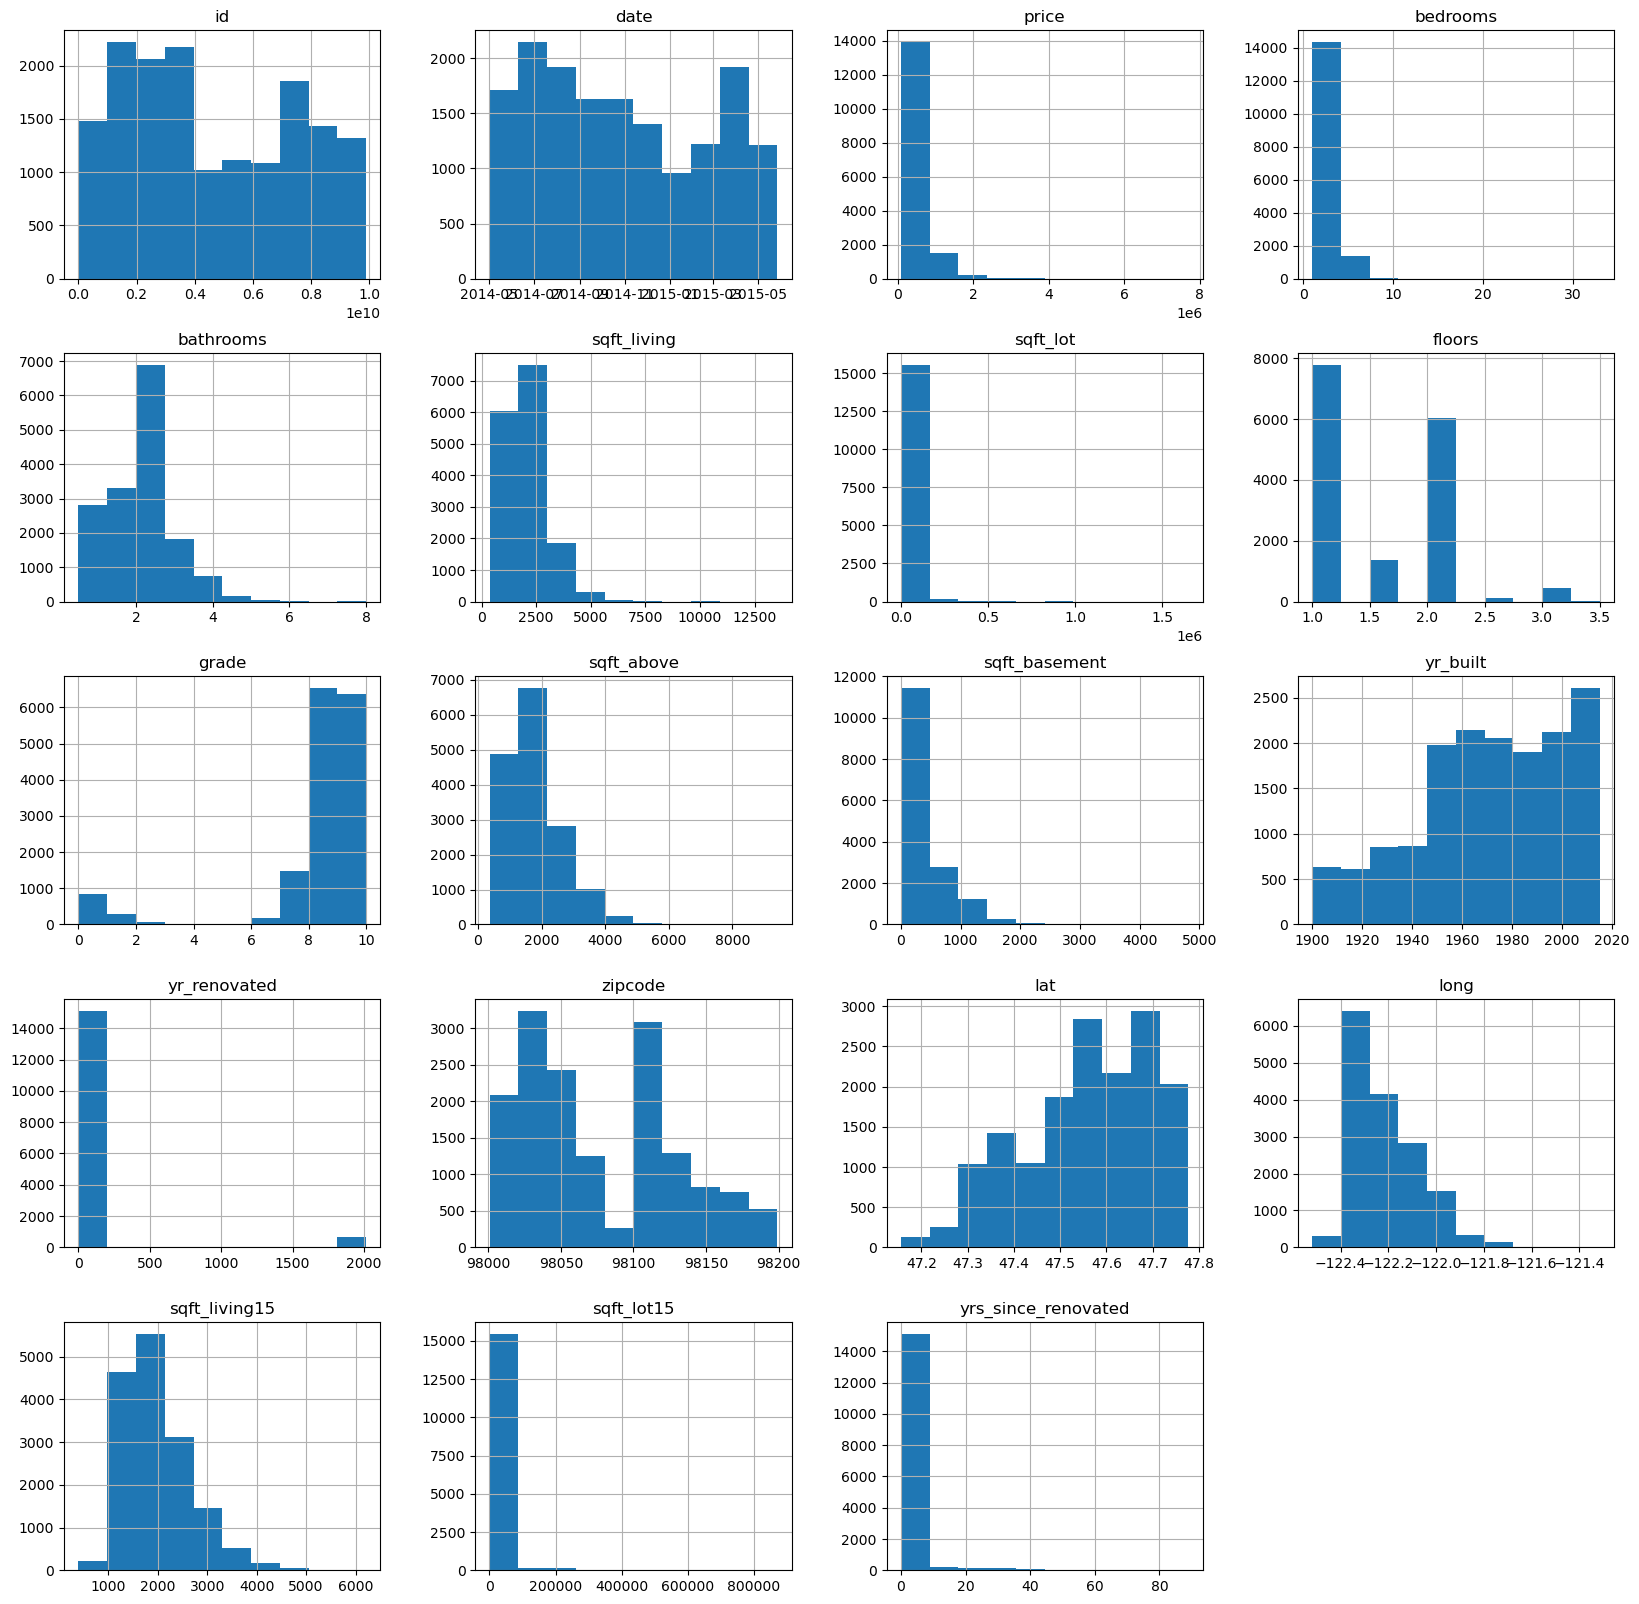

In [18]:
data.hist(figsize=(20,20));

##### Bar charts were used to visualize price per count of categorical variables 
##### namely; `waterfront`, `view`, `condition`, `grade` and `seasons`

##### Waterfont 

Text(0.5, 1.0, 'Mean Price Distribution by Waterfront')

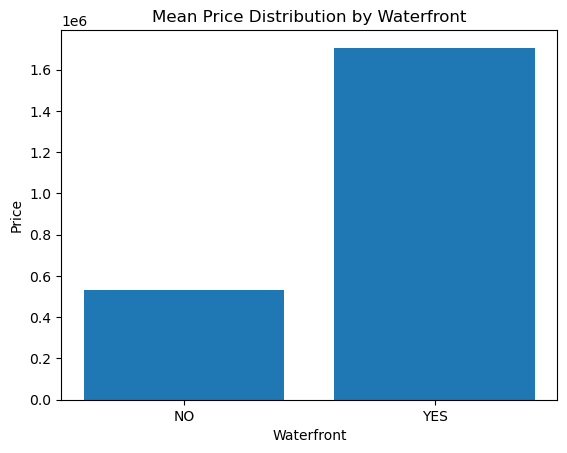

In [43]:
# Group the data by the waterfront category and calculate the mean price
grouped_data = data.groupby('waterfront')['price'].mean()

# Create a bar graph
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Mean Price Distribution by Waterfront')

* Houses with a waterfront had a higher price 


Text(0.5, 1.0, 'Mean Price Distribution by View')

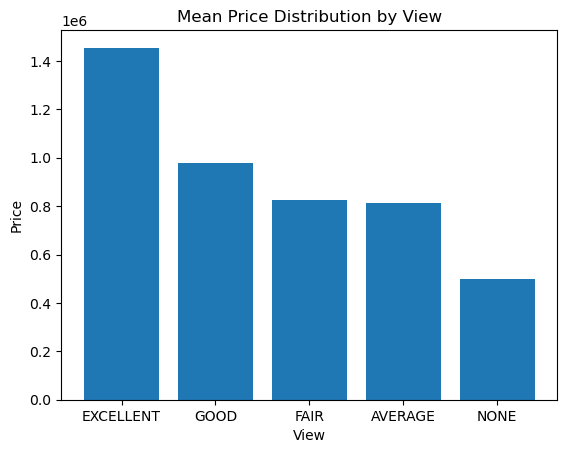

In [42]:
# Group the data by the view category and calculate the mean price
grouped_data = data.groupby('view')['price'].mean()

# Sort the data by mean price in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Create a bar graph
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Mean Price Distribution by View')

* Houses with excellent view have highest prices followed by those with good, fair, average and none respectively

Text(0.5, 1.0, 'Mean Price Distribution by Seasons')

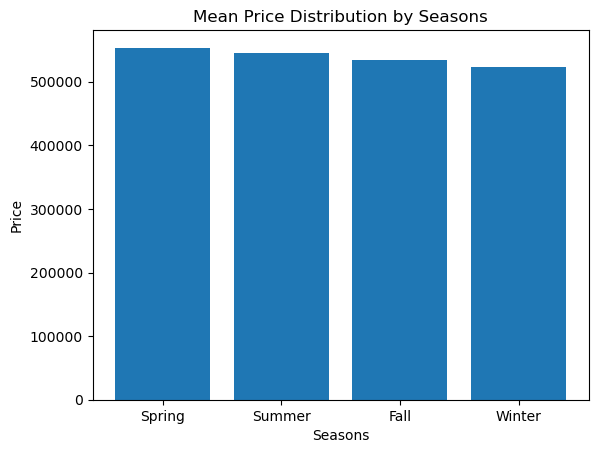

In [41]:
# Group the data by the seasons category and calculate the mean price
grouped_data = data.groupby('seasons')['price'].mean()

# Sort the data by mean price in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Create a bar graph
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Seasons')
plt.ylabel('Price')
plt.title('Mean Price Distribution by Seasons')

* Houses sold during spring had highest prices followed by summer, fall and winter

Text(0.5, 1.0, 'Price Distribution by Condition')

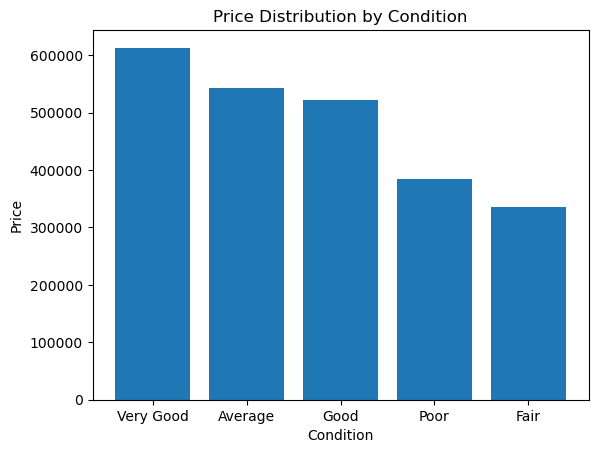

In [38]:
# Group the data by the condition category and calculate the mean price
grouped_data = data.groupby('condition')['price'].mean()

# Sort the data by mean price in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Create a bar graph
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price Distribution by Condition')

* Houses with very good condition had the highest price followed by those with average, good, poor and fair conditions respetively. 

#### Mapping the houses

In [21]:

# Creating  a map centered around the mean latitude and longitude
center_lat = data['lat'].mean()
center_long = data['long'].mean()
house_map = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Marker cluster for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(house_map)

# Iterate over the rows and add markers to the map
for index, row in data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Display the map
house_map

* The map indicates most houses sold ale along waterfront

#### Dropping Columns
 * Dropped `Zip Code` because it only represents geographical location which I did not use in modelling. Houses are relatively in same place.
 * The `sqft_living15` denotes the square footage of interior housing living space for the nearest 15 neighbors. While `sqft_lot15` denotes the square footage of the land lots of the nearest 15 neighbors. These variables cannot be changed by a seller to change value of house hence dropped
 * The `long` and `lat` will be  used to show location of houses and not add value in  model hence not used in modelling. 
 * `Date` dropped has it has been used to develop `seasons` variable which will be used in the model
 * `yr_renovated` is dropped  has it  has been  feature engineered to produce `yrs_since_renovated` which will be used in the model

In [22]:
data_encoded.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built'], axis=1, inplace= True)


#### Checking for Linear Regression Assumptions

#### Multicollinearity
 * variables with pairwise correlation of  0.75 or more show multicollinearity

In [23]:
# selecting variables for multicollinearity check 
x_variables = ['bedrooms', 'bathrooms', 'sqft_basement','sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above']
subset = data_encoded[x_variables]
correlation_matrix = subset.corr()

# Filter the correlation matrix to keep only correlations above 0.5 snd remove same variable correlation which is 1
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1)]

# Create a table with one column for the correlation values
correlation_table = pd.DataFrame(filtered_corr_matrix.unstack().sort_values(ascending=False), columns=['Pairwise Correlation'])

# Drop NaN values (correlations below the threshold)
correlation_table.dropna(inplace=True)
print(correlation_table)

                         Pairwise Correlation
sqft_living sqft_above                   0.88
sqft_above  sqft_living                  0.88
bathrooms   sqft_living                  0.75
sqft_living bathrooms                    0.75
bathrooms   sqft_above                   0.69
sqft_above  bathrooms                    0.69
bedrooms    sqft_living                  0.57
sqft_living bedrooms                     0.57
floors      sqft_above                   0.53
sqft_above  floors                       0.53
bedrooms    bathrooms                    0.51
bathrooms   bedrooms                     0.51
            floors                       0.51
floors      bathrooms                    0.51


* The findings show  that there was  `high correlation` between  between sqft_living  and bathrooms; sqft_above and  sqft_living. This is because increasing number or size of bathrooms increases Square footage of house. Also sqft_above which  Square footage of house apart from basement is similar to sqft_living which is  Square footage of living space in the home.  As such Square footage  is `kept` while bathrooms and sqft_above are  `dropped` 

##### Dropping highly correlated columns

In [24]:
data_encoded.drop (['sqft_above', 'bathrooms'], axis=1, inplace= True)

### Assumption of Normality 
#### Normality was checked using scatter plot 

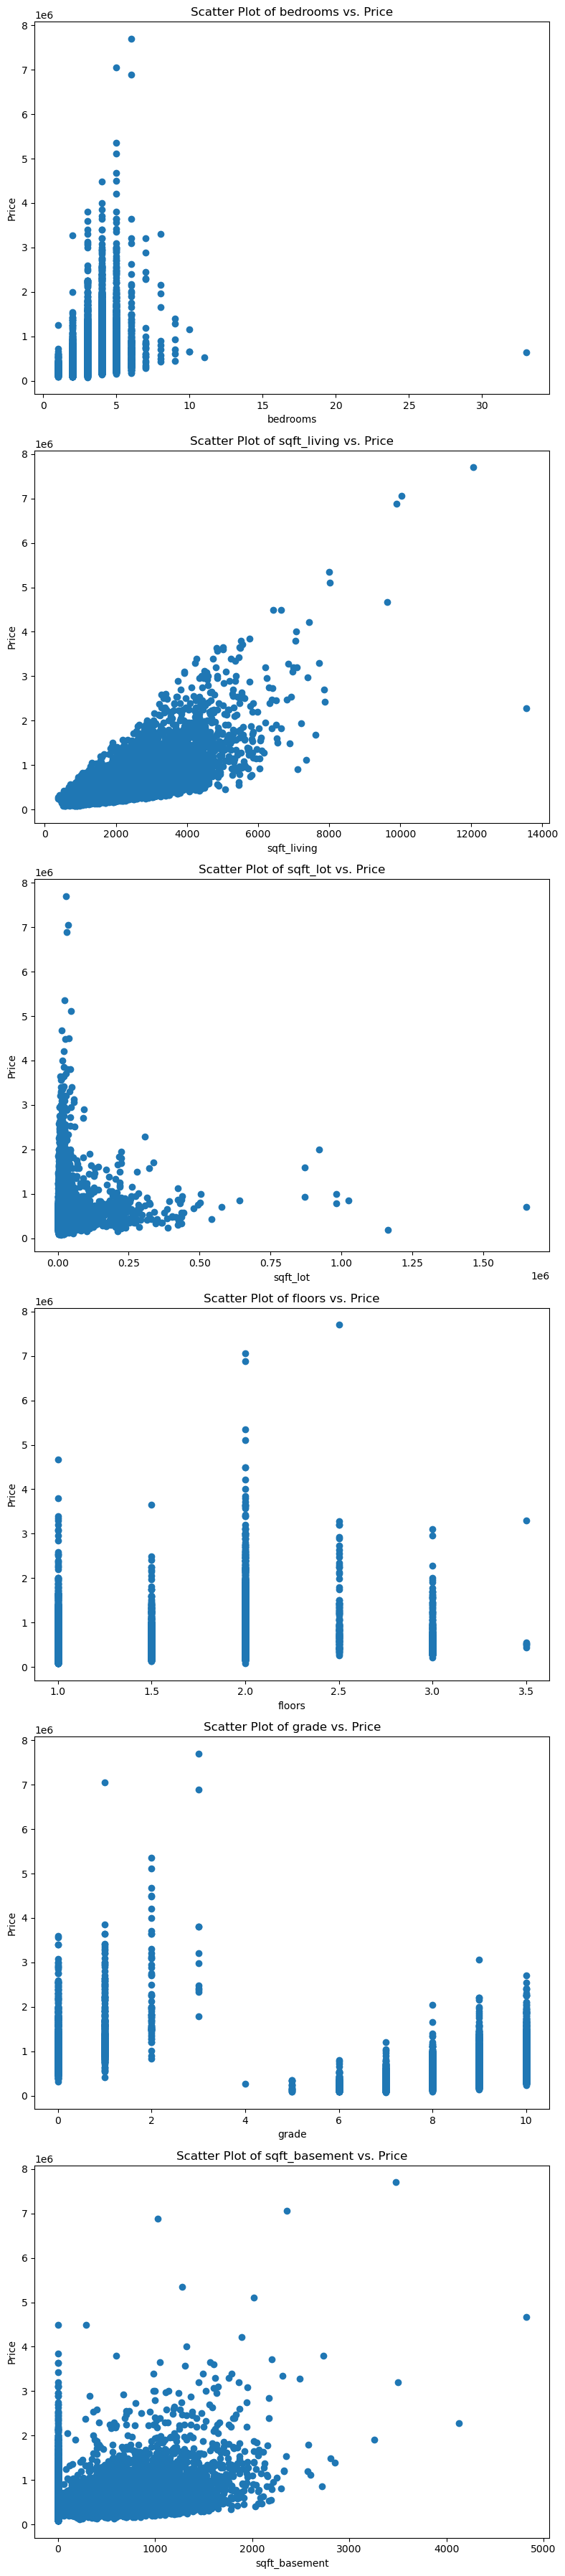

In [25]:
x_variables = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_basement']
# Create subplots to display multiple scatter plots
fig, axs = plt.subplots(len(x_variables), 1, figsize=(8, len(x_variables) * 6))

# Iterate over each predictor variable and create scatter plots
for i, variable in enumerate(x_variables):
    axs[i].scatter(data[variable], data['price'])
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'Scatter Plot of {variable} vs. Price')

# Adjust spacing between subplots
plt.tight_layout()

 * The results show the data is not normally distributed. Grade, bedrooms and floors are ordinal data which less likely to be normally distributed compared to interval or ratio data. Ordinal data has a discrete and limited number of possible values hence often does not follow a normal distribution. As such the assumption of normality is overlooked. This is a limitation of  the data. 

### Assumption of Linearity 
#### Correlation was to test for linear association between variables.


In [26]:
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns

correlation_matrix = data_encoded[numeric_columns].corr()
price_correlations = correlation_matrix['price']

# Exclude correlation with 'price' variable
correlation_without_price = price_correlations.drop('price')

# Order correlations in ascending order
ordered_correlations = correlation_without_price.abs().sort_values(ascending= False)

print(ordered_correlations)

sqft_living           0.71
grade                 0.37
sqft_basement         0.32
bedrooms              0.31
view_EXCELLENT        0.31
waterfront_YES        0.27
floors                0.26
view_GOOD             0.18
view_AVERAGE          0.15
view_FAIR             0.10
yrs_since_renovated   0.09
sqft_lot              0.08
condition_Very Good   0.06
condition_Fair        0.05
condition_Good        0.03
seasons_Winter        0.02
seasons_Fall          0.01
condition_Average     0.01
seasons_Summer        0.01
Name: price, dtype: float64


* sqft_living has the `highest` correlation with price. The are  variables with correlations less than 0.2 with price indicating a small linear association. Even though small linear assocaition the variables are kept as they may contribute to the model by explaining additional variance or interacting with other variables

### Modelling 

Baseline model  is with variable with the highest correlation with price.
* ```alpha``` of ```0.05``` used 

* Model evaluation
    * Adjusted R-squared to show variation explained
    * Durbin-Watson test to detect autocorrelation in residuals, ensuring the validity of regression analysis. 
    * Durbin-Watson test provides a diagnostic measure of model quality
    * Durbin-Watson test value between 1.5 and 2.5 indicates no significant autocorrelation 
* Model comparison
    * Adjusted R-squared to show variation explained. Higher Adjusted R-squared indicates  better model
    * AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to compare goodness-of-fit and complexity of the models. Lower AIC and BIC values indicate a better model

### Baseline Model.
#### The above findings show that sqft_living have the highest correlation  with price hence will form the baseline model.

In [27]:

y = data_encoded ['price']
x = data_encoded [['sqft_living']]

x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:31:12   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      

#### Evaluating Model Performance using Durbin-Watson.
 * The model has a Durbin-Watson of 1.979 which shows that there is no significant autocorrelation.


### Interpretation of the model

* With an F-statistic p-value below 0.05, the overall model is `statistically significant`

* The results show that sqft_living explains `49.9%` variation in price of houses.

* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values  below 0.05

* An increase of 1 square foot in the living area leads to a price increase of approximately $286.


 ####  The model with sqft_living as the independent variable only explains 49% variation in price. As such there is need for more variables to explain more variation and make more accurate prediction. 

### Second Model with Addition of Explanatory Variables

In [28]:
x = data_encoded[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade',
       'sqft_basement', 'yrs_since_renovated', 'waterfront_YES',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'seasons_Fall', 'seasons_Summer',
       'seasons_Winter']]
y = data_encoded['price']

# Add constant column for intercept
x = sm.add_constant(x)

# Perform multiple regression using OLS
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:31:12   Log-Likelihood:            -2.1743e+05
No. Observations:               15762   AIC:                         4.349e+05
Df Residuals:                   15742   BIC:                         4.351e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.288e+05   5

#### Evaluating Model Performance using Durbin-Watson.
 * The model has a Durbin-Watson of 1.983 which shows that there is no significant autocorrelation.

#### Model Comparison
* Second model had  lower value AIC (434,900) and BIC (435,100) compared to model with `sqft_living` which has AIC (438,200) and BIC (438,200). As such second model is a better fit. 
* Second  model explains 59.5% of the total variation in price. This is an `improvement` from the baseline model which explained 49.9% of the variation.

### Interpretation

* The model is `statistically significant` since the F-statistic p-value is less than 0.05
* `Most` of the explanatory variables are statistically significant apart from `condition_Average`, `condition_Fair`, `condition`_`Good, condition`_`Very Good` and `sqft_basement` which did not have a statistically significant linear relationship with price
* When all independent values are zero the price of a house is $228,800
* An increase in one bedroom `reduces` price of house by $ 40,120
* An increase in one square footage of living space `increases` price of house by $266.
* An increase in one square footage of the lot leads to a `reduction` of price by $0.41
* An increase in one floor `increases` price by $35,700
* An increase of grade by one unit `reduces` price by $22,000
* An increase in one unit of the square footage of the basement increases price by $2.32, 
* An increase in one year for years since renovated leads to an `increase` of $2,618 in price
* Having a house with waterfront `increases` price by $494,900 compared to one without waterfront  
* A house having an average excellent view increase` price by $123,700 compared to that with no view 
* A house having an excellent view increase` price by $326,900 compared to that with no view 
* A house having a far view increase` price by $164,800   compared to that with no view  
* A house with a good view `increase` price by $176,000 compared to that with no view 
* Selling a house in fall `reduces` price by $26,040 compared to selling in spring
* Selling a house in summer `reduces` price by $26,780 compared to selling in spring
* Selling a house in winter `reduces` price by $32,670 compared to selling in spring 

### Conclusions
* Being on waterfront has highest positive effect followed by having an excellent, good, fair and average view respectively. 
* Number of floors, years since renovated and square footage of living space have moderate positive effect 
* Bedrooms have the highest negative effect on price followed by selling in winter, summer, fall and grade of house 

### Limitations
* The dataset does not include other factors such as location-specific characteristics, neighborhood amenities which determine price of houses
* The data is collected over a period of time which encompasses different economic situations, changing market conditions, economic trends, and policy changes which were affect house prices but were not captured in the dataset.


### Recommendations

* Put up houses for sale in spring as it fetches higher prices 
* Renovate houses as it increases value of the property 
* Increase the square footage of the living space as it increases value 
* Do not increase grade of the house as it reduces value of property 
* Do not increase number of bedrooms as it reduces   price of the house


#### Future work
* Reducing noise in the data to improve accuracy of the model 
* Add more variables such as economic condition data to understand their  effect on price of houses